# <font color='blue'>Aplicação de Machine Learning na Análise do Transtorno do Espectro Autista</font>

## <font color='blue'>Duelo de modelos - Regressão Logística, RandomForest, XGBoost e SVM</font>

In [1]:
# Bibliotecas para manipulação de dados
import pandas as pd
import numpy as np

# Bibliotecas para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas para pré-processamento e divisão de dados
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Bibliotecas para os modelos de machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Bibliotecas para métricas de avaliação
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Bibliotecas para Random Forest - Regressão
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier



import xgboost as xgb
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline

In [2]:
base = pd.read_csv('autism_screening_dados_consolidados.csv', delimiter=',')

In [3]:
base['ID'] = (base.index + 1).astype(str).str.zfill(4)

In [4]:
base

,quest1,quest2,quest3,quest4,quest5,quest6,quest7,quest8,quest9,quest10,...,etnia,icterícia,autismo,pais,triagem_antes,resultado,mais_18,respondido_por,classe/TEA,ID
0,1,1,1,1,0,0,1,1,0,0,...,White-European,0,0,United States,0,6.0,18 and more,Self,0,0001
1,1,1,0,1,0,0,0,1,0,1,...,Latino,0,1,Brazil,0,5.0,18 and more,Self,0,0002
2,1,1,0,1,1,0,1,1,1,1,...,Latino,1,1,Spain,0,8.0,18 and more,Parent,1,0003
3,1,1,0,1,0,0,1,1,0,1,...,White-European,0,1,United States,0,6.0,18 and more,Self,0,0004
4,1,0,0,0,0,0,0,1,0,0,...,?,0,0,Egypt,0,2.0,18 and more,?,0,0005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,0,1,0,1,1,0,1,1,1,1,...,White-European,0,0,Russia,0,7.0,18 and more,Self,1,0697
697,1,0,0,0,0,0,0,1,0,1,...,Hispanic,0,0,Mexico,0,3.0,18 and more,Parent,0,0698
698,1,0,1,1,1,0,1,1,0,1,...,?,0,0,Russia,0,7.0,18 and more,?,1,0699
699,1,0,0,1,1,0,1,0,1,1,...,South Asian,0,0,Pakistan,0,6.0,18 and more,Self,0,0700


In [5]:
#Fazer uma copia dos dados para fazer modificações e preservar os dados originais
df = base.copy()

In [6]:
#Retirar variaveis que podem atrapalhar o modelo preditivo
df = df.drop(columns=['etnia','pais','mais_18','respondido_por', 'ID', 'resultado'])

In [7]:
#Verificar se a copia dos dados tem algum valor nulo ou 'type' errado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   quest1         701 non-null    int64  
 1   quest2         701 non-null    int64  
 2   quest3         701 non-null    int64  
 3   quest4         701 non-null    int64  
 4   quest5         701 non-null    int64  
 5   quest6         701 non-null    int64  
 6   quest7         701 non-null    int64  
 7   quest8         701 non-null    int64  
 8   quest9         701 non-null    int64  
 9   quest10        701 non-null    int64  
 10  idade          701 non-null    float64
 11  genero         701 non-null    int64  
 12  icterícia      701 non-null    int64  
 13  autismo        701 non-null    int64  
 14  triagem_antes  701 non-null    int64  
 15  classe/TEA     701 non-null    int64  
dtypes: float64(1), int64(15)
memory usage: 87.8 KB


### <font color='darkblue'>1. Escolha do Modelo: Selecione os modelos que foram aprentados ao longo do curso. Pode ser Regressão Logística, Random Forest, XGBoost, SVM ou qualquer outro que tenha sido abordado.</font>

In [8]:
X = df.drop('classe/TEA', axis=1) # X contém todas as colunas exceto 'classe/TEA'
Y = df['classe/TEA'] # Y contém apenas a coluna 'classe/TEA'

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [10]:
# Instanciando o modelo de regressão logística
modelo1 = LogisticRegression(max_iter=1000)

In [11]:
# Instanciando o modelo Random Forest
modelo2 = RandomForestClassifier(random_state = 42)

In [12]:
# Instanciando o modelo XGBoost
modelo3 = xgb.XGBClassifier()

In [13]:
modelo3.fit(X_train, Y_train)
modelo3.objective

'binary:logistic'

In [14]:
# Instanciando o modelo SVM
modelo4 = SVC(kernel = 'linear', random_state = 1, C = 1.0)

In [15]:
modelo4.fit(X_train,Y_train)

SVC(kernel='linear', random_state=1)

### <font color='darkblue'>2. Aperfeiçoamento: Aplicar as técnicas aprendidas para melhorar o desempenho do modelo:</font>

### <font color='darkblue'>Cross Validation: Avaliar a robustez do modelo utilizando validação cruzada para garantir que ele generaliza bem.</font>

In [16]:
scoring = ['accuracy', 'precision', 'recall', 'f1']

In [17]:
resultados_modelo1 = cross_validate(modelo1, X, Y, cv=5, scoring=scoring)  # cv=5 define 5-fold cross-validation

for metrica in scoring:
    print('regressão logistica: ' ,metrica, resultados_modelo1['test_' + metrica].mean())

regressão logistica:  accuracy 0.9971428571428571
regressão logistica:  precision 0.9947368421052631
regressão logistica:  recall 0.9947368421052631
regressão logistica:  f1 0.9947368421052631


In [18]:
resultados_modelo2 = cross_validate(modelo2, X, Y, cv=5, scoring=scoring)  # cv=5 define 5-fold cross-validation

for metrica in scoring:
    print('Random Forest: ' ,metrica, resultados_modelo2['test_' + metrica].mean())  

Random Forest:  accuracy 0.9686220871327255
Random Forest:  precision 0.9712409812409813
Random Forest:  recall 0.9098150782361308
Random Forest:  f1 0.939169619717565


In [19]:
resultados_modelo3 = cross_validate(modelo3, X, Y, cv=5, scoring=scoring)  # cv=5 define 5-fold cross-validation

for metrica in scoring:
    print('XGBoost: ' ,metrica, resultados_modelo3['test_' + metrica].mean())  

XGBoost:  accuracy 0.9629078014184398
XGBoost:  precision 0.93641989589358
XGBoost:  recall 0.9257467994310099
XGBoost:  f1 0.9304668535021815


In [20]:
resultados_modelo4 = cross_validate(modelo4, X, Y, cv=5, scoring=scoring)  # cv=5 define 5-fold cross-validation

for metrica in scoring:
    print('SVM: ' ,metrica, resultados_modelo4['test_' + metrica].mean())  

SVM:  accuracy 1.0
SVM:  precision 1.0
SVM:  recall 1.0
SVM:  f1 1.0


* <font color='darkblue'>Resultados muito altos podem indicar que o conjunto de dados possui padrões fortemente separáveis.</font>

------------

### <font color='darkblue'>Balanceamento, Padronização e Normalização: Se o modelo lida com problemas de classes desbalanceadas, é preciso explorar técnicas como SMOTE, undersampling ou oversampling. Lembrar sempre de padronizar os dados, especialmente se for usar modelos que são sensíveis à escala das variáveis. </font>

### <font color='darkblue'>Hiperparâmetros: Utilizar GridSearchCV ou RandomSearchCV para encontrar os melhores parâmetros.</font>

In [21]:
# Padronizando os dados Regressão logistica
pipeline_modelo1 = Pipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=2000, class_weight='balanced', random_state=42))
])


In [22]:
param_grid_modelo1 = [{
    'model__C': [0.01, 0.1, 1, 10]
}]

In [23]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search_modelo1 = GridSearchCV(
    estimator=pipeline_modelo1,          # Modelo a ser usado
    param_grid=param_grid_modelo1,       # Conjunto de parâmetros
    scoring='recall',                    # Métrica de avaliação
    cv=cv,                                # Número de folds para cross-validation
    n_jobs=-1,                           # Usa todos os processadores disponíveis
    verbose=1
)

In [24]:
grid_search_modelo1.fit(X_train, Y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\marina\anaconda3\envs\jupyter7\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('scaler', StandardScaler()),
                                       ('model',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=2000,
                                                           random_state=42))]),
             n_jobs=-1, param_grid=[{'model__C': [0.01, 0.1, 1, 10]}],
             scoring='recall', verbose=1)

In [25]:
# Melhor modelo e parâmetros da Regressão logistica
print("Melhores Parâmetros:", grid_search_modelo1.best_params_)
print("\n Melhor scoring:", grid_search_modelo1.best_score_)

Melhores Parâmetros: {'model__C': 0.01}

 Melhor scoring: 1.0


----------------

In [26]:
# Padronizando os dados Random Forest
pipeline_modelo2 = Pipeline(steps=[('smote', SMOTE(random_state=42)), ('scaler', StandardScaler()), ('model', modelo2)])

* <font color='darkblue'>Apesar de o modelo de árvore não precisar do StandardScaler, esse será mantido somente para manter um padrão de aplicação nos códigos.</font>

In [27]:
param_grid_modelo2 = [{
    'model': [RandomForestClassifier(random_state=42, class_weight='balanced')],
    'model__n_estimators': [100, 300],
    'model__max_depth': [None, 5, 10]
}]

In [28]:
grid_search_modelo2 = GridSearchCV(
    estimator=pipeline_modelo2,         # Modelo a ser usado
    param_grid=param_grid_modelo2,      # Conjunto de parâmetros
    scoring='recall',                   # Métrica de avaliação
    cv=5,                               # Número de folds para cross-validation
    n_jobs=-1                           # Usa todos os processadores disponíveis
)

In [29]:
grid_search_modelo2.fit(X_train, Y_train)

C:\Users\marina\anaconda3\envs\jupyter7\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('scaler', StandardScaler()),
                                       ('model',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid=[{'model': [RandomForestClassifier(class_weight='balanced',
                                                           random_state=42)],
                          'model__max_depth': [None, 5, 10],
                          'model__n_estimators': [100, 300]}],
             scoring='recall')

In [30]:
# Melhor modelo e parâmetros do Random Forest
print("Melhores Parâmetros:", grid_search_modelo2.best_params_)
print("\n Melhor scoring:", grid_search_modelo2.best_score_)

Melhores Parâmetros: {'model': RandomForestClassifier(class_weight='balanced', random_state=42), 'model__max_depth': 5, 'model__n_estimators': 100}

 Melhor scoring: 0.9793103448275863


-----------

In [31]:
# Padronizando os dados XGBoost
pipeline_modelo3 = Pipeline(steps=[('smote', SMOTE(random_state=42)), ('scaler', StandardScaler()), ('model', modelo3)])

In [32]:
param_grid_modelo3 = [{
    'model__max_depth': [3, 5, 7],              # Profundidade máxima 
    'model__n_estimators': [50, 100, 200],      # Número de estimadores
    'model__learning_rate': [0.01, 0.1, 0.2],   # Taxa de aprendizado
    'model__subsample': [0.8, 1.0],             # Proporção de amostras usadas para treinar 
    'model__colsample_bytree': [0.8, 1.0],      # Proporção de características
    'model__eval_metric': ['logloss'],          # Metrica de avaliação
    'model__min_child_weight': [1]
}]


In [33]:
grid_search_modelo3 = GridSearchCV(
    estimator=pipeline_modelo3,         # Modelo a ser usado
    param_grid=param_grid_modelo3,      # Conjunto de parâmetros
    scoring='recall',                   # Métrica de avaliação
    cv=5,                               # Número de folds para cross-validation
    n_jobs=-1                           # Usa todos os processadores disponíveis
)

In [34]:
grid_search_modelo3.fit(X_train, Y_train)

C:\Users\marina\anaconda3\envs\jupyter7\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('scaler', StandardScaler()),
                                       ('model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None,...
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid=[{'model__colsample_bytree': [0.8, 1.0],
                          'model__eval_metric': ['logloss'],
                          'model__learning_rate': [0.01, 0.1, 0.2],
                          'model__max_depth': [3, 5, 7],
                          'model__min_child_weight': [1],
                          'model__n_estimators': [50, 100, 200],
                          'model__subsample': [0.8, 1.0]}],
             scoring='recall')

In [35]:
# Melhor modelo e parâmetros do XGBoost
print("Melhores Parâmetros:", grid_search_modelo3.best_params_)
print("\n Melhor scoring:", grid_search_modelo3.best_score_)

Melhores Parâmetros: {'model__colsample_bytree': 0.8, 'model__eval_metric': 'logloss', 'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__min_child_weight': 1, 'model__n_estimators': 100, 'model__subsample': 0.8}

 Melhor scoring: 0.9862068965517242


------------

In [36]:
# Padronizando os dados SVM
pipeline_modelo4 = Pipeline(steps=[('smote', SMOTE(random_state=42)), ('scaler', StandardScaler()), ('model', modelo4)])

In [37]:
param_grid_modelo4_linear = [{
    'model__kernel': ['linear'],
    'model__C': [0.01, 0.1, 1, 10, 100],
    'model__class_weight': ['balanced']
}]

In [38]:
grid_search_modelo4_linear = GridSearchCV(
    estimator=pipeline_modelo4,                # Modelo a ser usado
    param_grid=param_grid_modelo4_linear,      # Conjunto de parâmetros
    scoring='recall',                          # Métrica de avaliação
    cv=5,                                      # Número de folds para cross-validation
    n_jobs=-1                                  # Usa todos os processadores disponíveis
)

In [39]:
grid_search_modelo4_linear.fit(X_train, Y_train)

C:\Users\marina\anaconda3\envs\jupyter7\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('scaler', StandardScaler()),
                                       ('model',
                                        SVC(kernel='linear', random_state=1))]),
             n_jobs=-1,
             param_grid=[{'model__C': [0.01, 0.1, 1, 10, 100],
                          'model__class_weight': ['balanced'],
                          'model__kernel': ['linear']}],
             scoring='recall')

In [40]:
# Melhor modelo e parâmetros do SVM
print("Melhores Parâmetros:", grid_search_modelo4_linear.best_params_)
print("\n Melhor scoring:", grid_search_modelo4_linear.best_score_)

Melhores Parâmetros: {'model__C': 0.01, 'model__class_weight': 'balanced', 'model__kernel': 'linear'}

 Melhor scoring: 0.993103448275862


In [41]:
param_grid_modelo4_rbf = [{
    'model__kernel': ['rbf'],
    'model__C': [0.01, 0.1, 1, 10, 100],
    'model__gamma': ['scale', 0.01, 0.1],
    'model__class_weight': ['balanced']
}]

In [42]:
grid_search_modelo4_rbf = GridSearchCV(
    estimator=pipeline_modelo4,             # Modelo a ser usado
    param_grid=param_grid_modelo4_rbf,      # Conjunto de parâmetros
    scoring='recall',                       # Métrica de avaliação
    cv=5,                                   # Número de folds para cross-validation
    n_jobs=-1                               # Usa todos os processadores disponíveis
)

In [43]:
grid_search_modelo4_rbf.fit(X_train, Y_train)

C:\Users\marina\anaconda3\envs\jupyter7\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('scaler', StandardScaler()),
                                       ('model',
                                        SVC(kernel='linear', random_state=1))]),
             n_jobs=-1,
             param_grid=[{'model__C': [0.01, 0.1, 1, 10, 100],
                          'model__class_weight': ['balanced'],
                          'model__gamma': ['scale', 0.01, 0.1],
                          'model__kernel': ['rbf']}],
             scoring='recall')

In [44]:
# Melhor modelo e parâmetros
print("Melhores Parâmetros:", grid_search_modelo4_rbf.best_params_)
print("\n Melhor scoring:", grid_search_modelo4_rbf.best_score_)

Melhores Parâmetros: {'model__C': 0.01, 'model__class_weight': 'balanced', 'model__gamma': 0.01, 'model__kernel': 'rbf'}

 Melhor scoring: 1.0


-----------------

### <font color='darkblue'>3. Treinamento: Treine o seu modelo com os dados de treino e gere as previsões para os dados de teste.</font>

In [45]:
best_model_modelo1 = grid_search_modelo1.best_estimator_  #gerando previsões no conjunto de teste
y_pred_modelo1 = best_model_modelo1.predict(X_test)

In [46]:
conf_matrix = confusion_matrix(Y_test, y_pred_modelo1)  #visualização da matriz
print('Matriz de Confusão da Regressão logística:')
print(conf_matrix)

relatorio = classification_report(Y_test, y_pred_modelo1)  #visualização do modelo
print("\n Relatório de Classificação da Regressão logística:")
print(relatorio)

Matriz de Confusão da Regressão logística:
[[91  7]
 [ 0 43]]

 Relatório de Classificação da Regressão logística:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        98
           1       0.86      1.00      0.92        43

    accuracy                           0.95       141
   macro avg       0.93      0.96      0.94       141
weighted avg       0.96      0.95      0.95       141



In [47]:
best_model_modelo2 = grid_search_modelo2.best_estimator_  #gerando previsões no conjunto de teste
y_pred_modelo2 = best_model_modelo2.predict(X_test)  

In [48]:
conf_matrix = confusion_matrix(Y_test, y_pred_modelo2)  #visualização da matriz
print('Matriz de Confusão do Random Forest:')
print(conf_matrix)

relatorio = classification_report(Y_test, y_pred_modelo2)  #visualização do modelo
print("Relatório de Classificação do Random Forest:")
print(relatorio)

Matriz de Confusão do Random Forest:
[[88 10]
 [ 1 42]]
Relatório de Classificação do Random Forest:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94        98
           1       0.81      0.98      0.88        43

    accuracy                           0.92       141
   macro avg       0.90      0.94      0.91       141
weighted avg       0.93      0.92      0.92       141



In [49]:
best_model_modelo3 = grid_search_modelo3.best_estimator_  #gerando previsões no conjunto de teste
y_pred_modelo3 = best_model_modelo3.predict(X_test) 

In [50]:
conf_matrix = confusion_matrix(Y_test, y_pred_modelo3)  #visualização da matriz
print('Matriz de Confusão do XGBoost:')
print(conf_matrix)

relatorio = classification_report(Y_test, y_pred_modelo3)  #visualização do modelo
print("Relatório de Classificação do XGBoost:")
print(relatorio)

Matriz de Confusão do XGBoost:
[[89  9]
 [ 1 42]]
Relatório de Classificação do XGBoost:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95        98
           1       0.82      0.98      0.89        43

    accuracy                           0.93       141
   macro avg       0.91      0.94      0.92       141
weighted avg       0.94      0.93      0.93       141



In [51]:
best_model_modelo4 = grid_search_modelo4_rbf.best_estimator_  #gerando previsões no conjunto de teste
y_pred_modelo4 = best_model_modelo4.predict(X_test) 

In [52]:
conf_matrix = confusion_matrix(Y_test, y_pred_modelo4)  #visualização da matriz
print('Matriz de Confusão do SVM:')
print(conf_matrix)

relatorio = classification_report(Y_test, y_pred_modelo4)  #visualização do modelo
print("Relatório de Classificação do SVM:")
print(relatorio)

Matriz de Confusão do SVM:
[[86 12]
 [ 0 43]]
Relatório de Classificação do SVM:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        98
           1       0.78      1.00      0.88        43

    accuracy                           0.91       141
   macro avg       0.89      0.94      0.91       141
weighted avg       0.93      0.91      0.92       141



<font color='darkblue'>Modelos</font> | <font color='darkblue'>Classe</font> | <font color='darkblue'>precision</font> |  <font color='darkblue'>recall</font>   | <font color='darkblue'>f1-score</font>  |
|-----------------------|-----------|-----------------------|------------------|-----------------|
| Regressão Logística   |    0	    |         1.00	        |      0.93        |        0.96	 |
| Regressão Logística   |    1	    |         0.86	        |      1.00        |        0.92	 | 
|-----------------------|-----------|-----------------------|------------------|-----------------|
|    Random Forest	    |    0	    |         0.99	        |      0.90        |        0.94	 |
|    Random Forest	    |    1	    |         0.81	        |      0.98        |        0.88	 |
|-----------------------|-----------|-----------------------|------------------|-----------------|
|        XGBoost        |    0	    |         0.99	        |      0.91        |        0.95	 | 
|        XGBoost        |    1	    |         0.82	        |      0.98        |        0.89	 |   
|-----------------------|-----------|-----------------------|------------------|-----------------|
|          SVM	        |    0	    |         1.00	        |      0.88        |        0.93	 |    
|          SVM	        |    1	    |         0.78	        |      1.00        |        0.88	 |
|-----------------------|-----------|-----------------------|------------------|-----------------|

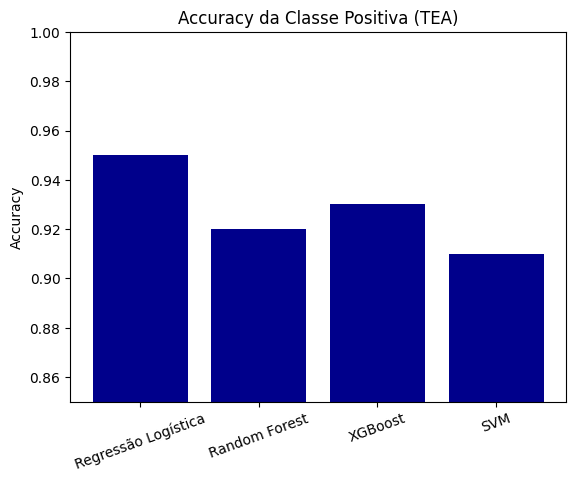

In [53]:
modelo =['Regressão Logística', 'Random Forest', 'XGBoost', 'SVM']
accuracy = [0.95, 0.92, 0.93, 0.91]


plt.figure()
plt.bar(modelo,accuracy, color='darkblue')
plt.title('Accuracy da Classe Positiva (TEA)')
plt.ylabel('Accuracy')
plt.ylim(0.85, 1.0)
plt.xticks(rotation=20)
plt.show()

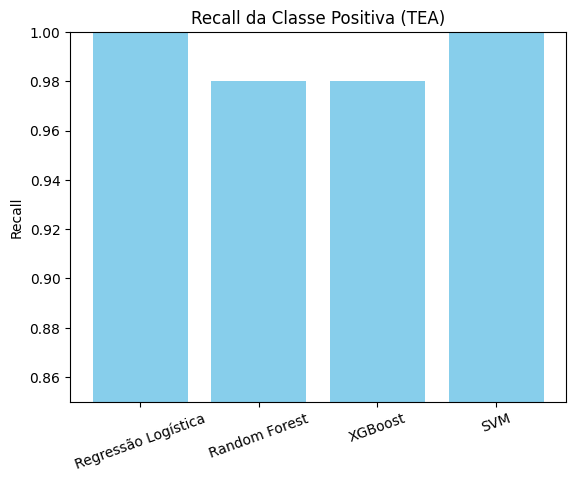

In [54]:
modelo =['Regressão Logística', 'Random Forest', 'XGBoost', 'SVM']
recall = [1.00, 0.98, 0.98, 1.00]

plt.figure()
plt.bar(modelo,recall, color='skyblue')
plt.title('Recall da Classe Positiva (TEA)')
plt.ylabel('Recall')
plt.ylim(0.85, 1.0)
plt.xticks(rotation=20)
plt.show()

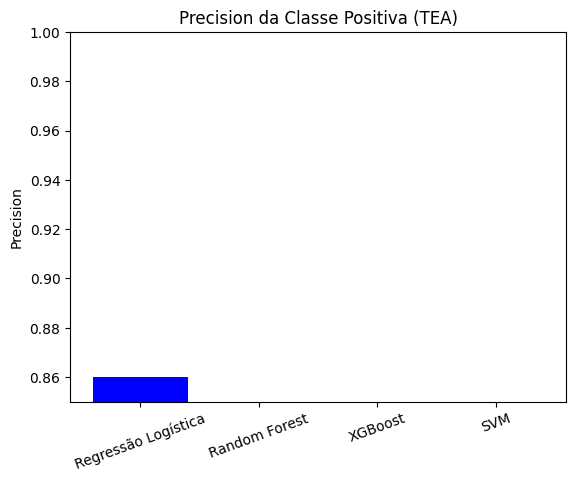

In [55]:
modelo =['Regressão Logística', 'Random Forest', 'XGBoost', 'SVM']
precision = [0.86, 0.81, 0.82, 0.78]

plt.figure()
plt.bar(modelo,precision, color='blue')
plt.title('Precision da Classe Positiva (TEA)')
plt.ylabel('Precision')
plt.ylim(0.85, 1.0)
plt.xticks(rotation=20)
plt.show()

➔ <font color='darkblue'>Matriz de Confusão do Regressão Logística:
* verdadeiro positivo = 43
* verdedeiro negativo = 91
* falso negativo = 0
* falso positivo = 7</font>

<font color='darkblue'>O modelo de Regressão Logística alcançou o recall máximo (1.00) para a classe positiva no conjunto de teste, assim demonstrando que todos os casos de TEA foram corretamente identificados. Nota-se também um número pequeno de falsos positivos (7) e zero de falsos negativos (0), resultando em uma boa precisão (≈0.86), embora não máxima, sendo adequado para aplicações de triagem, nas quais a minimização de falsos negativos é prioridade.</font>

➔ <font color='darkblue'>Matriz de Confusão do Random Forest:
* verdadeiro positivo = 42
* verdedeiro negativo = 88
* falso negativo = 1
* falso positivo = 10</font>

<font color='darkblue'>O modelo Random Forest apresentou um bom desempenho no conjunto de teste, especialmente no recall da classe positiva (≈0.98), o que indica alta capacidade para identificar corretamente indivíduos com TEA. Nota-se também a presença de alguns falsos positivos, o que afeta a precisão do modelo. No entanto, esse comportamento é aceitável no contexto da triagem.</font>

➔ <font color='darkblue'>Matriz de Confusão do XGBoost:
* verdadeiro positivo = 42
* verdedeiro negativo = 89
* falso negativo = 1
* falso positivo = 9</font>

<font color='darkblue'>O modelo XGBoost demonstrou um desempenho consistente no conjunto de teste, com um recall de (≈0.98) para a classe positiva, o que indica uma excelente capacidade de identificação de casos de TEA. O modelo apresentou equilíbrio entre precisão e sensibilidade, com uma leve melhoria em relação ao Random Forest.</font>

➔ <font color='darkblue'>Matriz de Confusão do SVM:
* verdadeiro positivo = 43
* verdedeiro negativo = 86
* falso negativo = 0
* falso positivo = 12</font>

<font color='darkblue'>O modelo SVM com kernel RBF alcançou um recall máximo (1.00) para a classe positiva no conjunto de teste, o que indica que todos os casos de TEA foram corretamente identificados. Todavia, observou-se um maior número de falsos positivos, o que compromete a precisão do modelo. Esse comportamento é comum em modelos de alta sensibilidade e deve ser avaliado conforme o objetivo da aplicação.</font>

<font color='darkblue'>Modelos</font> | <font color='darkblue'>Accuracy</font> | <font color='darkblue'>precision (Classe 1)</font> |  <font color='darkblue'>recall (Classe 1)</font> |
|-----------------------|-----------|-----------------------|------------------|
| Regressão Logística   |   0.95	|         0.86          |      1.00        |
|-----------------------|-----------|-----------------------|------------------|
|    Random Forest	    |   0.92    |         0.81	        |      0.98        |
|-----------------------|-----------|-----------------------|------------------|
|        XGBoost        |   0.93    |         0.82	        |      0.98        |
|-----------------------|-----------|-----------------------|------------------|
|          SVM	        |   0.91    |         0.78	        |      1.00        |  
|-----------------------|-----------|-----------------------|------------------|

* <font color='darkblue'>Melhor equilíbrio geral: XGBoost</font>
* <font color='darkblue'>Maior sensibilidade (triagem): Regressão Logística ou SVM</font>
* <font color='darkblue'>Modelo final escolhido: XGBoost</font>

<font color='darkblue'>De modo geral, todos os modelos apresentaram um bom desempenho no conjunto de teste. A Regressão Logística e o SVM destacaram-se pelo alto recall da classe positiva sendo adequados para cenários de triagem, onde a prioridade é minimizar falsos negativos. O Random Forest e o XGBoost apresentaram um desempenho equilibrado, com um número menor de falsos positivos. Dentre os modelos avaliados, o XGBoost foi escolhido como o modelo final por apresentar o melhor equilíbrio entre sensibilidade e precisão, além de uma boa capacidade de generalização.</font>

In [56]:
df.to_csv('autism_modelo_preditivo.csv', index=False, encoding='utf-8-sig')

print("Arquivo 'autism_modelo_preditivo.csv' exportado com sucesso!")

Arquivo 'autism_modelo_preditivo.csv' exportado com sucesso!
